### Knapsack

### K-Colorability

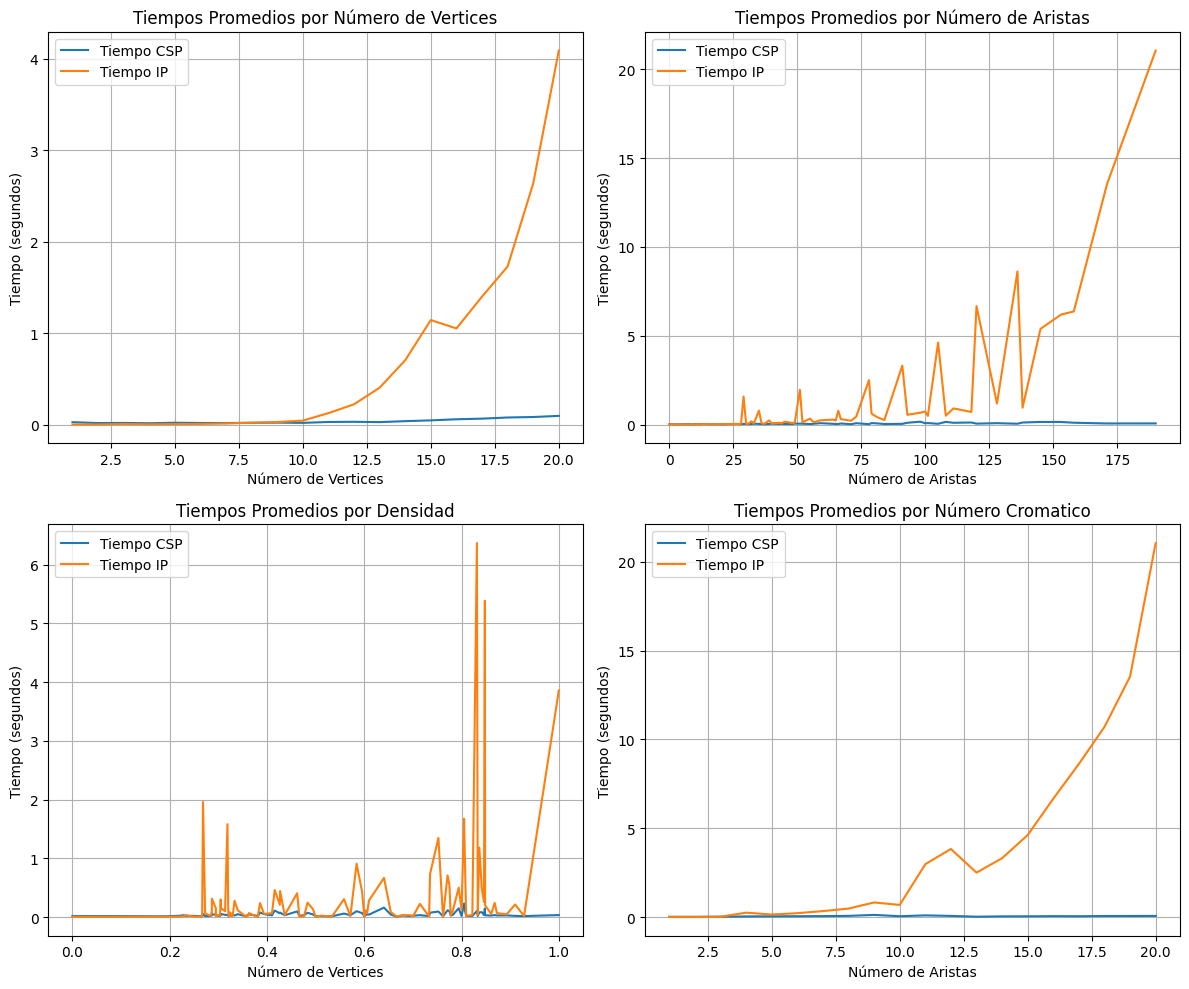

In [12]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

if os.path.exists('K_Colorability/data.json'):
        # Leer el contenido existente del archivo JSON
        with open('K_Colorability/data.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'numero de vertices':[],
    'numero de aristas':[],
    "densidad":[],
    "numero cromático":[],
    "CSP":[],
    "IP":[]

}

for key in datos.keys():
    n = datos[key]['description']['vertices']
    m = len(datos[key]['description']['aristas'])
    k = datos[key]["results"][0]["result"]

    tabla['numero de vertices'].append(n)
    tabla['numero de aristas'].append(m)
    tabla["densidad"].append(0 if m==0 else m/(n*(n-1)/2))
    tabla["numero cromático"].append(k)

    for solucion in datos[key]["results"]:
        tabla[solucion['method']].append(solucion['time'])


df = pd.DataFrame(tabla)

# Promedios por número de nodos
promedio_tiempo_vertices = df[['numero de vertices', 'CSP', 'IP']].groupby('numero de vertices').mean()

# Promedios por número de aristas
promedio_tiempo_aristas = df[['numero de aristas', 'CSP', 'IP']].groupby('numero de aristas').mean()


# Promedios por densidad
promedio_tiempo_densidad = df[['densidad', 'CSP', 'IP']].groupby('densidad').mean()


# Promedios por número cromático
promedio_tiempo_numero_cromatico = df[['numero cromático', 'CSP', 'IP']].groupby('numero cromático').mean()


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1) # (filas, columnas, índice)
plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Número de Vertices')
plt.xlabel('Número de Vertices')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Segunda gráfica: Tiempos promedio por número de aristas
plt.subplot(2, 2, 2)
plt.plot(promedio_tiempo_aristas.index, promedio_tiempo_aristas['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_aristas.index, promedio_tiempo_aristas['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Número de Aristas')
plt.xlabel('Número de Aristas')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Tercera gráfica: Tiempos promedio por densidad
plt.subplot(2, 2, 3) # (filas, columnas, índice)
plt.plot(promedio_tiempo_densidad.index, promedio_tiempo_densidad['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_densidad.index, promedio_tiempo_densidad['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Densidad')
plt.xlabel('Número de Vertices')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Cuarta gráfica: Tiempos promedio por número cromatico
plt.subplot(2, 2, 4)
plt.plot(promedio_tiempo_numero_cromatico.index, promedio_tiempo_numero_cromatico['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_numero_cromatico.index, promedio_tiempo_numero_cromatico['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Número Cromatico')
plt.xlabel('Número de Aristas')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()
